# Project Title: Lead Scoring for X Education

### $ 1. Introduction $
##### X Education, an online course provider catering to industry professionals, faces a challenge with its lead conversion process. Despite attracting a substantial number of potential customers, the current lead conversion rate stands at approximately 30%. In an effort to significantly improve this rate, X Education aims to implement a lead scoring model to identify and prioritize high-conversion probability leads, commonly referred to as 'Hot Leads.'

### $ 2. Problem   Statement $
##### The current lead conversion process at X Education involves various stages, from attracting leads through website interactions to engaging with them through calls and emails. However, the conversion rate remains suboptimal. The company wishes to enhance efficiency by developing a lead scoring model that assigns a score to each lead, allowing the sales team to focus efforts on leads with a higher likelihood of conversion.

### $ 3. Objective $
##### The primary objective of this project is to increase the lead conversion rate from the existing 30% to approximately 80%. This will be achieved by implementing a lead scoring system that evaluates and prioritizes leads based on their conversion potential.

### Import Libraries

In [579]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings('ignore')


### Reading and Understanding Data

In [580]:
data = pd.read_csv("C:\\Users\\praya\\Downloads\\Lead+Scoring+Case+Study\\Lead Scoring Assignment\\Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [581]:
#checking total rows and columns in dataset
data.shape

(9240, 37)

#### NOTE : The original dataframe has 9240 rows and 37 columns

In [582]:
#info check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [583]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [584]:
# check if there are any duplicates present
print('Duplicate values present : ',data.duplicated().sum())

Duplicate values present :  0


### EDA on data

### Data Cleaning 

#### NOTE: As mentioned in problem statement many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value

In [585]:
# List of columns having 'Select' as value

cols_with_select_value = data.columns[data.apply(lambda col: 'Select' in col.values)]

print(list(cols_with_select_value))

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [586]:
# Converting 'Select' values to NaN.
data = data.replace('Select', np.nan)

In [587]:
# Checking if all 'Select' values have been handled in the columns
cols_with_select_value = data.columns[data.apply(lambda col: 'Select' in col.values)]

print(list(cols_with_select_value))

[]


##### Checking null values

In [588]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [589]:
missing_percentage = (data.isnull().sum() / len(data)) * 100

#we will drop the columns with more than 40% missing values present
print('Total columns dropped :', len(missing_percentage[missing_percentage > 40].index))
print('Name of the columns dropped :',list( missing_percentage[missing_percentage > 40].index))

Total columns dropped : 7
Name of the columns dropped : ['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [590]:
print('Shape before dropping columns : ' ,data.shape)

Shape before dropping columns :  (9240, 37)


In [591]:

columns_to_drop = missing_percentage[missing_percentage > 40].index
data.drop(columns=columns_to_drop, axis=1,inplace =True)

In [592]:
print('Shape before dropping columns : ' ,data.shape)

Shape before dropping columns :  (9240, 30)


In [593]:
# Checking the percentage of null values for remaining columns

((data.isnull().sum() / len(data)) * 100).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

#### NOTE: There are many columns so we are diving them into 2 parts as "Categorical' and 'Numerical' .As it will be easy to inspect the data

In [594]:
# Select the columns with categorical data type
categorical_cols = data.select_dtypes(include=['category', 'object']).columns

print(list(categorical_cols))

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [595]:
# Checking for missing values
((data[categorical_cols].isnull().sum() / len(data)) * 100).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Last Activity                                     1.114719
Lead Source                                       0.389610
Prospect ID                                       0.000000
Through Recommendations                           0.000000
A free copy of Mastering The Interview            0.000000
I agree to pay the amount through cheque          0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Newspaper Article                                 0.000000
Digital Advertisement                             0.0000

In [596]:
print('Columns to be inspected : ', list(data[categorical_cols].columns[data[categorical_cols].isnull().sum() > 0]))

Columns to be inspected :  ['Lead Source', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'City']


##### NOTE: Checking value counts of the selected columns


In [597]:
#checking value counts of City column
data['City'].value_counts(normalize=True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

##### City has 39.71 % missing values. And the value "Mumbai' holds 57.8% values of this column,imputing missing values with Mumbai will make the data more biased. So City column can be dropped.

In [598]:
data.drop('City',inplace=True,axis=1)

In [599]:
#checking value counts of Specialization column
data['Specialization'].value_counts(normalize=True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

##### The 'Specialization' column has 36.58% missing values. But the selected specializations are evenly distributed. So instead of filling in missing values or removing the column, Let's create a new category called 'Others' for unspecified specializations.

In [600]:
data['Specialization'] = data['Specialization'].fillna('Others')

In [601]:
# Checking values again
data['Specialization'].value_counts(normalize=True,dropna=False)*100

Others                               36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [602]:
#checking value counts of Tags column

data['Tags'].value_counts(normalize=True,dropna=False)*100

NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

##### The 'Tags' column has 36.29% missing values. Since it represents the current status of leads and won't be useful for modeling due to the high percentage of missing data, it's better to drop this column.

In [603]:
data.drop('Tags',inplace=True,axis=1)

In [604]:
#checking value counts of What matters most to you in choosing a course column

data['What matters most to you in choosing a course'].value_counts(normalize=True,dropna=False)*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

#####  The variable has 29.32% missing values, and 70.65% of customers have selected 'better career prospects'. This extreme skewness makes it less informative, so using this variable may not provide meaningful insights. So this column can be dropped.

In [605]:
data.drop('What matters most to you in choosing a course',inplace=True,axis=1)

In [606]:
#checking value counts of What is your current occupation column

data['What is your current occupation'].value_counts(normalize=True,dropna=False)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64


##### We can fill in the missing values with 'Unemployed' since it's the most common category. In the context of our business the column seems too important to drop.

In [607]:
data['What is your current occupation'] = data['What is your current occupation'].fillna('Unemployed')

In [608]:
# Checking values again
data['What is your current occupation'].value_counts(normalize=True,dropna=False)*100

Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [609]:
#checking value counts of Country column

data['Country'].value_counts(normalize=True,dropna=False)*100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

##### As we can see there are 26.63% missing values and 70.06% of the customers are from India. I doesoes not make business sense to impute missing values with India. So Country column can be dropped.

In [610]:
data.drop('Country',inplace=True,axis=1)

In [611]:
# Checking the value counts of Last Activity

data['Last Activity'].value_counts(normalize=True)*100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

##### We can see that in "Last Activity" column some labels have very few records. These will create unnecessary columns when we create dummy variables, so we can group these categories together under "Others". 

In [612]:
data['Last Activity'] = data['Last Activity'].fillna('Email Opened')

In [613]:
# Grouping low frequency value levels to Others 
data['Last Activity'] = data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [614]:
# Checking the value counts of Last Activity again

data['Last Activity'].value_counts(normalize=True)*100

Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: Last Activity, dtype: float64

In [615]:
# Checking the value counts of Lead Source

data['Lead Source'].value_counts(normalize=True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

##### We can see that in "Lead Source" column some labels have very few records. These will create unnecessary columns when we create dummy variables, so we can group these categories together under "Others". 

In [616]:
data['Lead Source'] = data['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

##### As we can see we have 'Google' as well as 'google' both in the data, so we can change it to one as 'Google'. After that we can fill the missing values with 'Google'

In [617]:
data['Lead Source'] = data['Lead Source'].replace('google','Google')
data['Lead Source'].fillna('Google', inplace = True)

In [618]:
# Checking the value counts of Lead Source agai

data['Lead Source'].value_counts(normalize=True)*100

Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: Lead Source, dtype: float64

In [619]:
# Checking for missing values in categorical columns again
((data[data.select_dtypes(include=['category', 'object']).columns].isnull().sum() / len(data)) * 100).sort_values(ascending=False)

Prospect ID                                 0.0
X Education Forums                          0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
Newspaper Article                           0.0
Lead Origin                                 0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Do Not Call                                 0.0
Do Not Email                                0.0
Lead Source                                 0.0
Last Notable Activity                   

In [620]:
# Select the columns with categorical data type
numeric_cols = data.select_dtypes(include=['int', 'float']).columns

print(list(numeric_cols))


['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


In [621]:
# Checking for missing values 
((data[numeric_cols].isnull().sum() / len(data)) * 100).sort_values(ascending=False)

TotalVisits                    1.482684
Page Views Per Visit           1.482684
Lead Number                    0.000000
Converted                      0.000000
Total Time Spent on Website    0.000000
dtype: float64

In [622]:
print('Columns to be inspected : ', list(data[numeric_cols].columns[data[numeric_cols].isnull().sum() > 0]))

Columns to be inspected :  ['TotalVisits', 'Page Views Per Visit']


In [623]:
# Checking the value counts of TotalVisits

(data['TotalVisits'].value_counts()).head()

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: TotalVisits, dtype: int64

##### TotalVisits missing values to be imputed with mode

In [624]:
data['TotalVisits'].fillna(data['TotalVisits'].mode()[0], inplace=True)

In [625]:
# Checking the value counts of TotalVisits again

(data['TotalVisits'].value_counts()).head()

0.0    2326
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: TotalVisits, dtype: int64

In [626]:
# Checking the value counts of Page Views Per Visit

(data['Page Views Per Visit'].value_counts()).head()

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: Page Views Per Visit, dtype: int64

##### Page Views Per Visit missing values to be imputed with mode

In [627]:
data['Page Views Per Visit'].fillna(data['Page Views Per Visit'].mode()[0], inplace=True)

In [628]:
# Checking the value counts of Page Views Per Visit again

(data['Page Views Per Visit'].value_counts()).head()

0.0    2326
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: Page Views Per Visit, dtype: int64

In [629]:
# Checking for missing values again
((data[data.select_dtypes(include=['int', 'float']).columns].isnull().sum() / len(data)) * 100).sort_values(ascending=False)

Lead Number                    0.0
Converted                      0.0
TotalVisits                    0.0
Total Time Spent on Website    0.0
Page Views Per Visit           0.0
dtype: float64

In [630]:
# Checking for missing values again in main dataframe
data.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content 

#### Now the dataframe has no missing values present

#### Checking if there are columns with one unique value

In [631]:
data.nunique()

Prospect ID                                 9240
Lead Number                                 9240
Lead Origin                                    5
Lead Source                                    9
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1731
Page Views Per Visit                         114
Last Activity                                  9
Specialization                                19
What is your current occupation                6
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates

In [632]:
print('Columns with only one uniqe value : ' , list(data.columns[data.nunique() == 1]))

Columns with only one uniqe value :  ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


#### NOTE:  Dropping columns with onee unique values as they lack variability and provide no meaningful information for analysis or modeling. Such columns do not contribute to the understanding of patterns or relationships within the data

In [633]:
data.drop(columns=data.columns[data.nunique() == 1],inplace=True)

In [634]:
print('The shape of the main dataframe now is :',data.shape)

The shape of the main dataframe now is : (9240, 21)


#### Dropping columns which are no use for modeling
#### such as:

1. 'Prospect ID',
2. 'Lead Number',
3. 'Last Notable Activity'
#### Above columns do not add any value to the model. So we can drop them


In [635]:
data.drop(['Prospect ID', 'Lead Number', 'Last Notable Activity'], inplace=True, axis=1)
print('The shape of the main dataframe now is :',data.shape)

The shape of the main dataframe now is : (9240, 18)


#### Checking and Dropping Category Columns that are Skewed

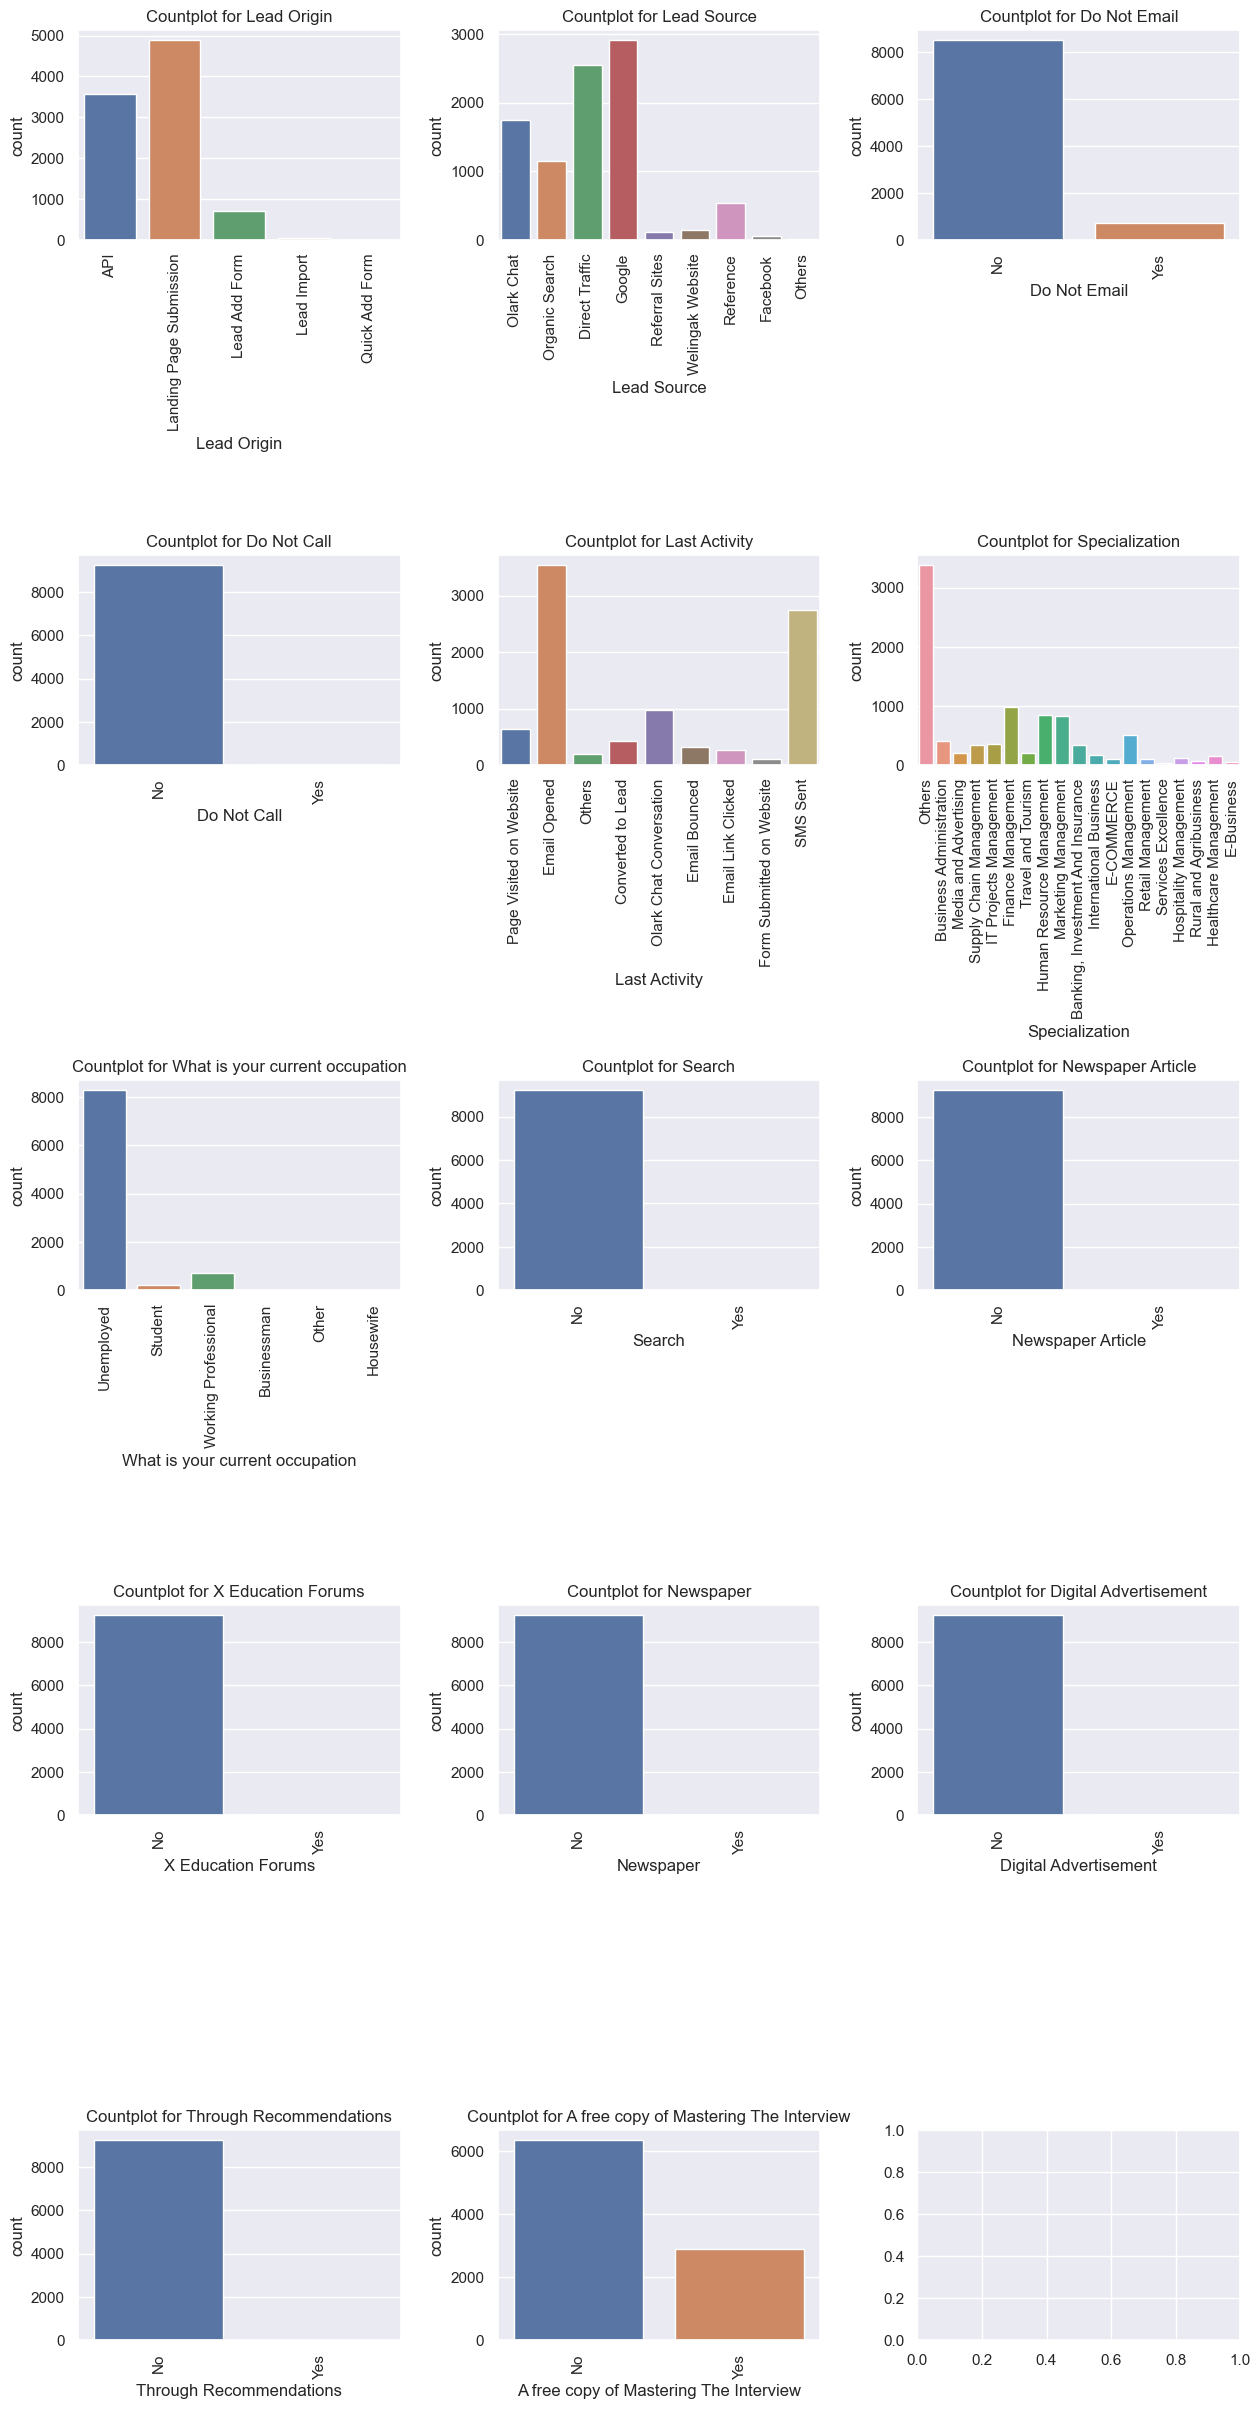

In [636]:
import math
n_columns = 3
n_rows = math.ceil(len(data.select_dtypes(include=['category', 'object']).columns) / n_columns)
sns.set(rc={'figure.figsize': (15, 6 * n_rows)})
fig, axes = plt.subplots(n_rows, n_columns)


axes = axes.flatten()

# Plot countplot for categorical columns
for i, column in enumerate(data.select_dtypes(include=['category', 'object']).columns):
    ax = axes[i]
    sns.countplot(x=column, data=data, ax=ax)
    ax.set_title(f'Countplot for {column}')
    ax.tick_params(axis='x', rotation=90)


plt.subplots_adjust(hspace=1.5, wspace=0.3)  
plt.show()



### We can see there are columnswhich have highly skewed data :
  1. Search
  2. Newspaper Article
  3. Through Recommendations
  4. Digital Advertisement
  5. Newspaper
  6. Do Not Call
  7. X Education Forums

#### We'll drop these columns as they won't contribute to the model. Skewed variables can affect logistic regression accuracy by causing biased parameter estimates.

In [637]:
to_drop =  ['Search','Newspaper Article','Through Recommendations','Digital Advertisement','Newspaper','Do Not Call','X Education Forums']
data.drop(columns=to_drop,axis=1,inplace=True)

In [638]:
print('The shape of the main dataframe now is :',data.shape)

The shape of the main dataframe now is : (9240, 11)


#### Check which columns have 'Yes' or 'No' as values

In [639]:

yes_no_columns = data.columns[data.apply(lambda col: col.isin(['Yes', 'No']).all())]

# Print the list of columns with 'Yes' or 'No' values
print(list(yes_no_columns))

['Do Not Email', 'A free copy of Mastering The Interview']


####  The are columns categorical columns, map them yes/no to 1/0

In [640]:
data[yes_no_columns] = data[yes_no_columns].replace({'Yes': 1, 'No': 0})

In [641]:
# Print the list of columns with 'Yes' or 'No' values again to check
data.columns[list(data.apply(lambda col: col.isin(['Yes', 'No']).all()))]

Index([], dtype='object')

In [642]:
# Re checking tht main dataframe info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   int6

### Final Auto EDA

In [643]:
#AutoEDA
from IPython.display import IFrame
import sweetviz as sv
report = sv.analyze(data)
report.show_html('report.html')
IFrame(src='report.html', width=1000, height=600)

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [644]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   int6

### Dummy Variable Creation

In [645]:
cat_col=data.select_dtypes(include=['object']).columns
cat_col

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation'],
      dtype='object')

In [646]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy = pd.get_dummies(data[cat_col], drop_first=True)

# now add them to the master dataframe
data = pd.concat([data, dummy], axis=1)

In [647]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,...,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0


In [648]:
# We have created dummies for the categorical variables, so we can drop them

data.drop(columns=data.select_dtypes(include='object').columns, inplace=True)

In [649]:
print('The shape of the main dataframe now is :',data.shape)

The shape of the main dataframe now is : (9240, 49)


## Train-Test Split

### Next we split the data into train and test sets

In [650]:
# Import library

from sklearn.model_selection import train_test_split

In [651]:
# Put all the feature variables in X
X = data.drop(['Converted'], 1)
X.head(1)

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [652]:
# Put the target variable in y

y= data['Converted']


In [653]:
# Splitting the data into 70 30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [654]:
#Checking shapes

print('X_train:', X_train.shape,'\ny_train:',y_train.shape)
print('X_test:', X_test.shape,'\ny_test:',y_test.shape)

X_train: (6468, 48) 
y_train: (6468,)
X_test: (2772, 48) 
y_test: (2772,)


### Scaling:

#### There are few variables with difeerent scale present in the data. So we have to scale it

In [655]:
#Import standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [656]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1871,-0.291638,-0.645678,-0.885371,-1.062143,-0.673169,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6795,-0.291638,0.109111,0.005716,-0.452487,1.485511,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3516,-0.291638,0.297808,-0.691418,0.083827,-0.673169,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8105,-0.291638,0.297808,1.365219,1.229797,-0.673169,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3934,-0.291638,-0.645678,-0.885371,-1.062143,-0.673169,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [657]:
# Checking the Lead Conversion Rate (LCR) - "Converted" is our Target Variable
# We will denote Lead Conversion Rate with 'LCR' as its short form

LCR = (sum(data['Converted'])/len(data['Converted'].index))*100
LCR

38.53896103896104

##### Conversion Rate is 38.5% 

In [658]:
# See the correlation

data.corr()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
Do Not Email,1.000000,-0.135580,0.033736,-0.046374,0.033445,0.055762,0.095304,-0.020983,-0.017529,0.035416,...,0.023426,0.028032,0.053781,0.002680,0.059722,-0.009669,-0.002609,0.006225,0.042780,-0.049841
Converted,-0.135580,1.000000,0.022502,0.362483,-0.014725,-0.039820,-0.051236,0.321702,-0.023695,0.013138,...,-0.009755,0.007200,-0.014956,0.019245,-0.009457,0.041567,0.020505,-0.004375,-0.281065,0.313837
TotalVisits,0.033736,0.022502,1.000000,0.209468,0.517122,0.207953,0.299552,-0.188992,-0.051979,-0.007301,...,0.038407,0.058949,0.016781,0.063671,0.065030,-0.008127,0.027284,-0.023539,0.015726,-0.009289
Total Time Spent on Website,-0.046374,0.362483,0.209468,1.000000,0.301036,0.168298,0.276009,-0.139681,-0.034926,0.032831,...,0.027458,0.020672,0.002900,0.049050,0.042640,0.007088,0.028115,-0.012518,-0.086489,0.099241
Page Views Per Visit,0.033445,-0.014725,0.517122,0.301036,1.000000,0.284812,0.494765,-0.295639,-0.078033,-0.011190,...,0.047270,0.027142,0.022127,0.066031,0.113997,-0.010309,0.016942,-0.031547,0.025897,-0.015201
A free copy of Mastering The Interview,0.055762,-0.039820,0.207953,0.168298,0.284812,1.000000,0.569633,-0.180893,-0.052178,-0.007015,...,0.049068,0.055865,0.055114,0.117472,0.123523,0.006210,-0.000005,-0.004130,0.008400,-0.005856
Lead Origin_Landing Page Submission,0.095304,-0.051236,0.299552,0.276009,0.494765,0.569633,1.000000,-0.307485,-0.081974,-0.011021,...,0.077786,0.057301,0.049035,0.126752,0.111901,-0.001898,0.002813,-0.000066,0.009529,-0.009242
Lead Origin_Lead Add Form,-0.020983,0.321702,-0.188992,-0.139681,-0.295639,-0.180893,-0.307485,1.000000,-0.022461,-0.003020,...,-0.022547,-0.016770,-0.012982,-0.025700,-0.037988,0.039627,-0.002366,0.009987,-0.181264,0.196526
Lead Origin_Lead Import,-0.017529,-0.023695,-0.051979,-0.034926,-0.078033,-0.052178,-0.081974,-0.022461,1.000000,-0.000805,...,-0.008094,-0.006905,-0.005102,-0.007951,-0.011598,-0.002547,-0.003223,-0.011801,0.016931,-0.011664
Lead Origin_Quick Add Form,0.035416,0.013138,-0.007301,0.032831,-0.011190,-0.007015,-0.011021,-0.003020,-0.000805,1.000000,...,-0.001088,-0.000928,-0.000686,-0.002061,-0.001559,-0.000342,-0.000433,-0.001587,0.003522,-0.002992


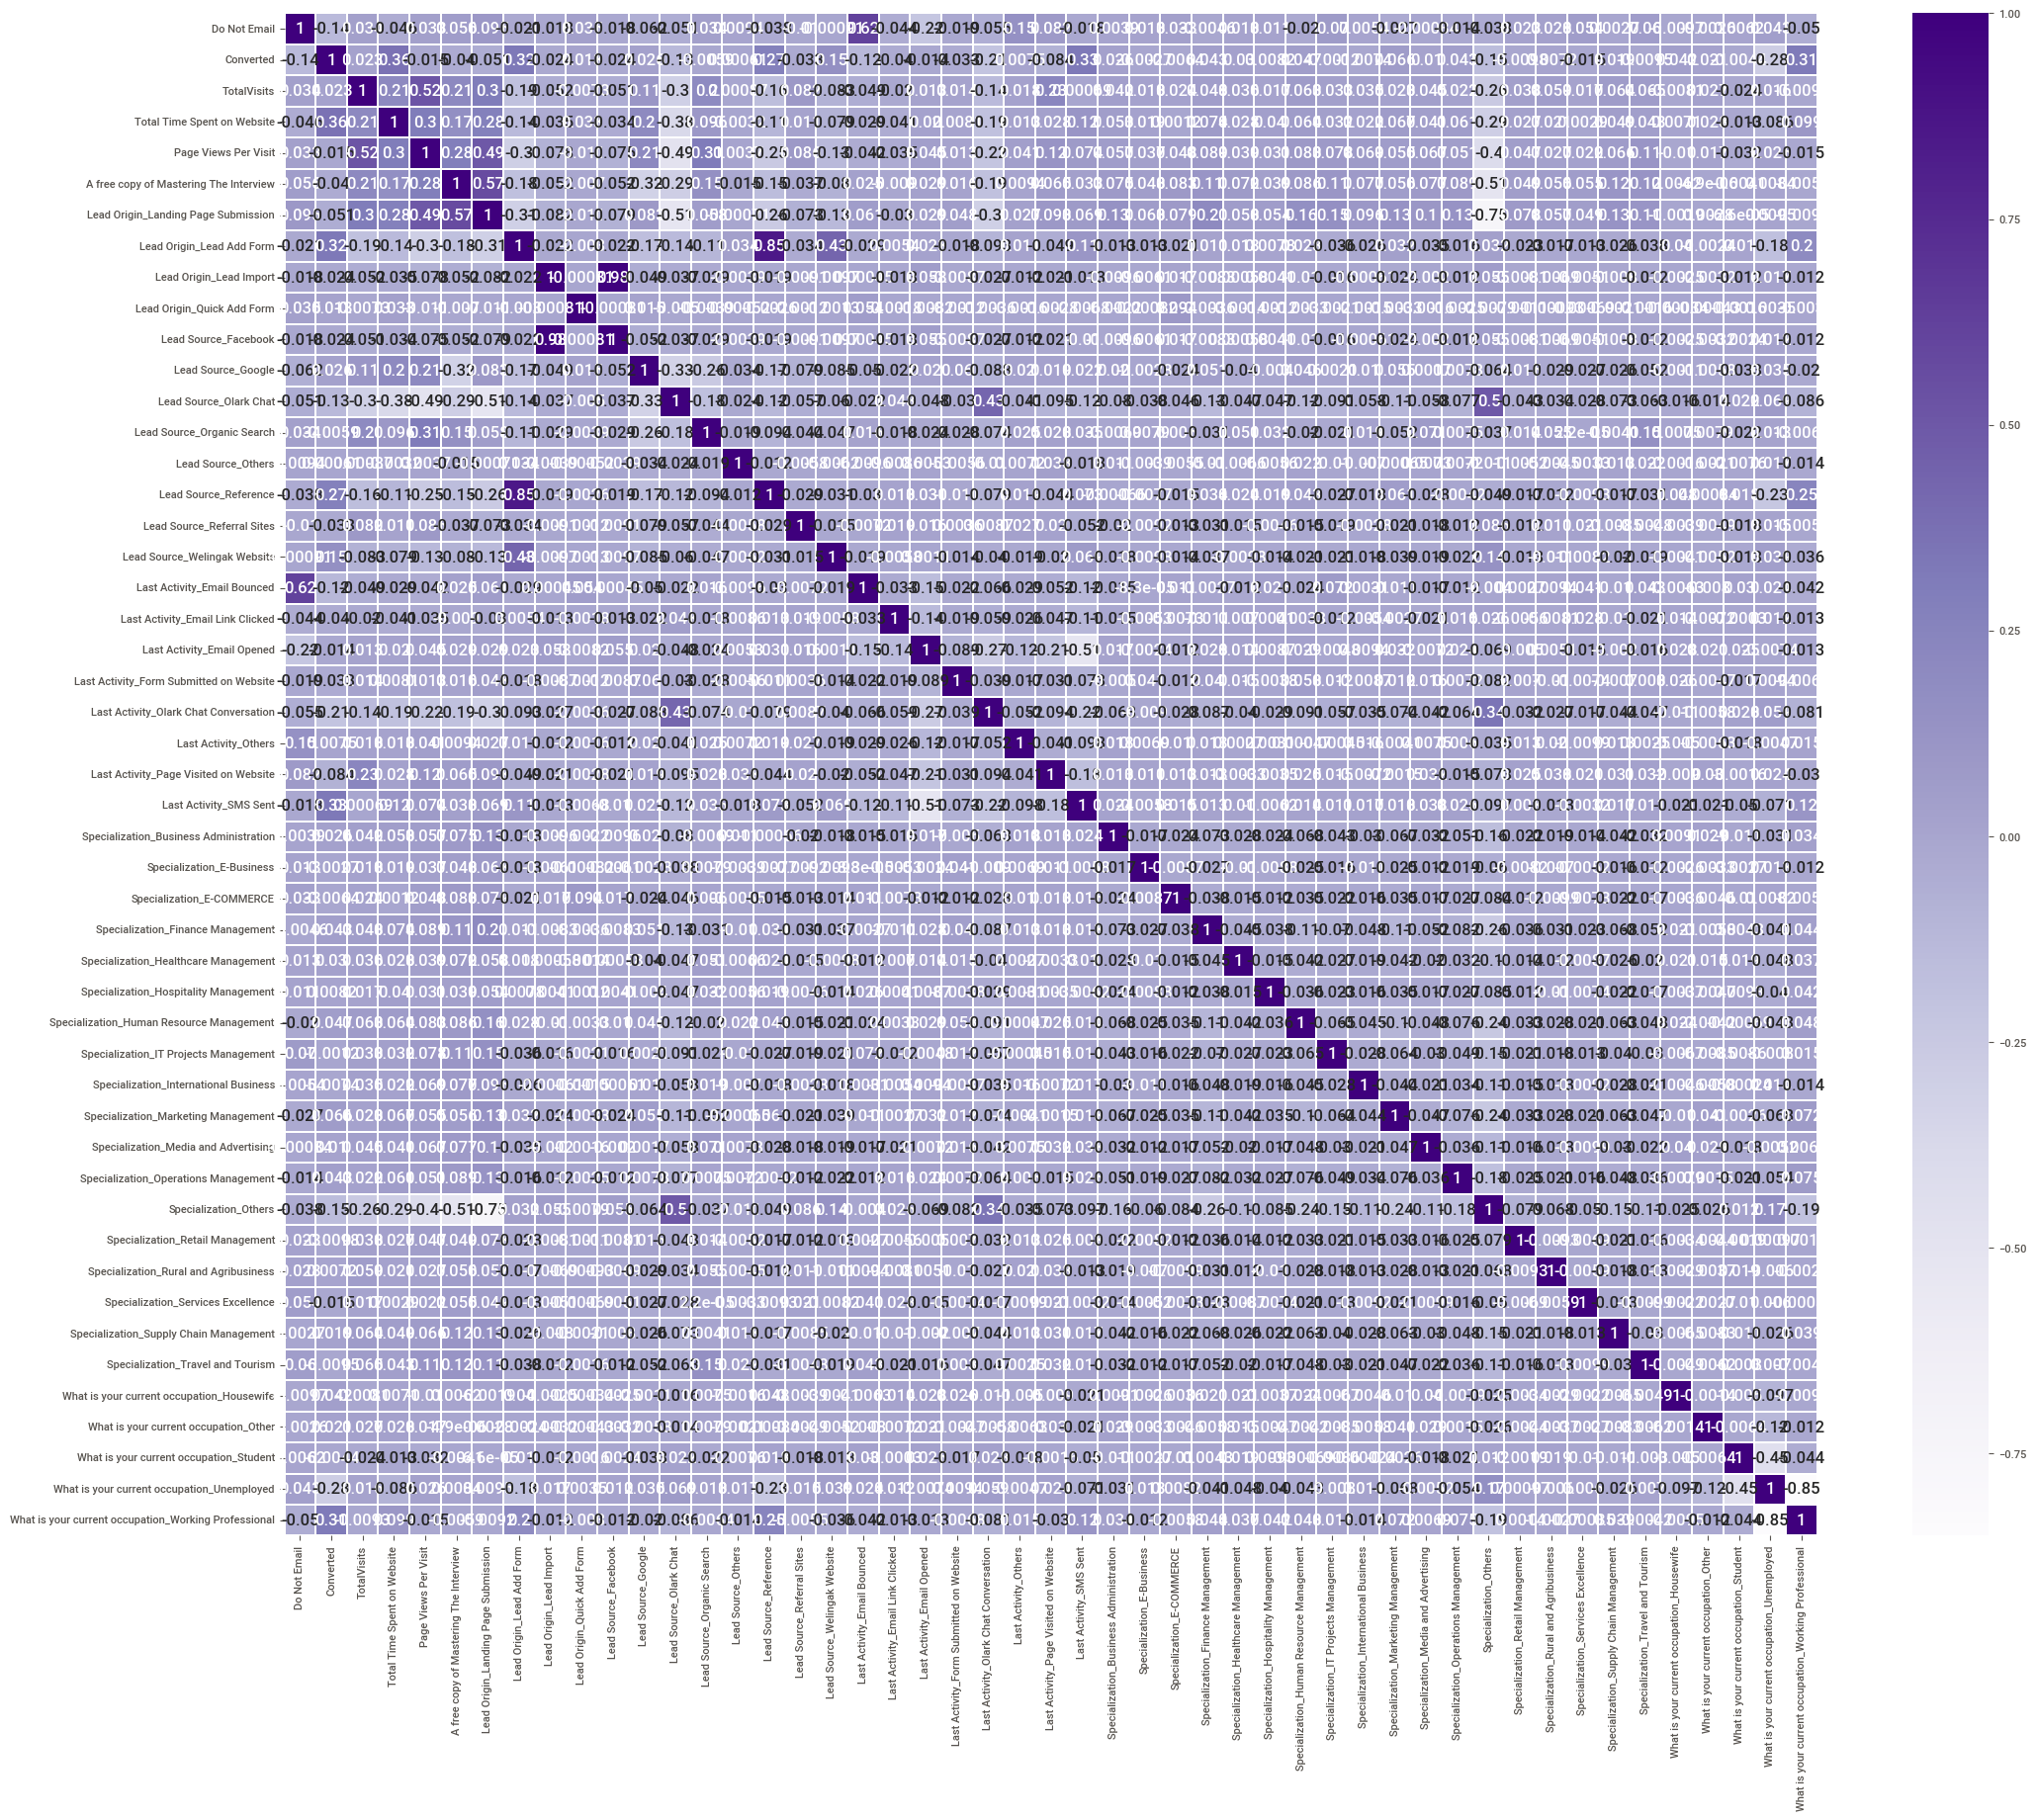

In [659]:
# Plotting heatmap to visualize correlations
plt.figure(figsize = (25,20))        
sns.heatmap(data.corr(),linewidths=0.04,cmap="Purples",annot=True)
plt.show()

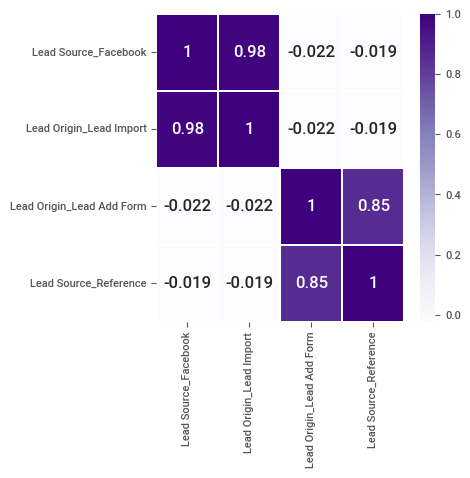

In [660]:
# as the above corelations has so many columns lets breakdown suspected variables which migh have high correlation with each other
# analysing variables which might be highly correlated with each other from same class from above graph
plt.figure(figsize = (4,4))        
sns.heatmap(data[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),linewidths=0.02,cmap="Purples",annot=True)
plt.show()

##### These predictor variables above are very highly correlated with each other near diagonal with (0.98 and 0.85), it is better that we drop one of these variables from each pair as they won’t add much value to the model. So , we can drop any of them, lets drop 'Lead Origin_Lead Import' and 'Lead Origin_Lead Add Form'.


In [661]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

## Model Building

### Now, let's build our model. With numerous variables in the dataset, we need a focused approach. We'll use Recursive Feature Elimination (RFE) to pick a handful of important features for our model

In [662]:
# Import Libraries

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [663]:
# Import RFE
from sklearn.feature_selection import RFE

In [664]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [665]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 10),
 ('TotalVisits', False, 13),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 14),
 ('A free copy of Mastering The Interview', False, 21),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 20),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', False, 11),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 23),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 29),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 12),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 25),
 ('Last Activity_Olark Chat Conversation', False, 9),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Busi

In [666]:

# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [667]:
# Defined function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

#### Model - 1

In [668]:
# Building model using statsmodels, for the detailed statistics

# columns selected by RFE to be used for this model 
rfe_col=X_train.columns[rfe.support_]

# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()  

logm1.params

const                                                   -1.546983
Total Time Spent on Website                              1.053574
Lead Origin_Landing Page Submission                     -1.256917
Lead Source_Olark Chat                                   0.892443
Lead Source_Others                                       0.937277
Lead Source_Reference                                    2.898488
Lead Source_Welingak Website                             5.359796
Last Activity_Email Link Clicked                         0.883653
Last Activity_Email Opened                               1.449137
Last Activity_Others                                     1.760354
Last Activity_Page Visited on Website                    0.800669
Last Activity_SMS Sent                                   2.568670
Specialization_Hospitality Management                   -1.051274
Specialization_Others                                   -1.189206
What is your current occupation_Housewife               23.152156
What is yo

In [669]:
#The summary of our logistic regression model
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2724.9
Date:                Tue, 26 Dec 2023   Deviance:                       5449.8
Time:                        20:32:23   Pearson chi2:                 8.14e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3854
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

##### 'What is your current occupation_Housewife' column has a high p-value of 0.999, The accepted threshold of is 0.05 for statistical significance.So the column will be dropped

In [670]:
# Dropping 'What is your current occupation_Housewife' colum
rfe_col=rfe_col.drop('What is your current occupation_Housewife')

#### Model - 2

In [671]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  

logm2.params

const                                                  -1.534971
Total Time Spent on Website                             1.052433
Lead Origin_Landing Page Submission                    -1.251393
Lead Source_Olark Chat                                  0.890119
Lead Source_Others                                      0.931320
Lead Source_Reference                                   2.915551
Lead Source_Welingak Website                            5.358981
Last Activity_Email Link Clicked                        0.881206
Last Activity_Email Opened                              1.443589
Last Activity_Others                                    1.746343
Last Activity_Page Visited on Website                   0.786855
Last Activity_SMS Sent                                  2.554636
Specialization_Hospitality Management                  -1.058816
Specialization_Others                                  -1.193212
What is your current occupation_Working Professional    2.700119
dtype: float64

In [672]:
#The summary of our logistic regression model
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.8
Date:                Tue, 26 Dec 2023   Deviance:                       5465.6
Time:                        20:32:23   Pearson chi2:                 8.16e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3839
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

##### "Lead Source_Others"olumn has a p-value of 0.070, The accepted threshold of is 0.05 for statistical significance.So the column will be dropped

In [673]:
# Dropping 'Lead Source_Others' colum
rfe_col=rfe_col.drop('Lead Source_Others')

### Model - 3

In [674]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()  

logm3.params

const                                                  -1.520354
Total Time Spent on Website                             1.050448
Lead Origin_Landing Page Submission                    -1.260421
Lead Source_Olark Chat                                  0.881645
Lead Source_Reference                                   2.904656
Lead Source_Welingak Website                            5.351789
Last Activity_Email Link Clicked                        0.877776
Last Activity_Email Opened                              1.443494
Last Activity_Others                                    1.751688
Last Activity_Page Visited on Website                   0.793936
Last Activity_SMS Sent                                  2.552356
Specialization_Hospitality Management                  -1.062515
Specialization_Others                                  -1.201589
What is your current occupation_Working Professional    2.694484
dtype: float64

In [675]:
# The summary of our logistic regression model
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2734.4
Date:                Tue, 26 Dec 2023   Deviance:                       5468.7
Time:                        20:32:23   Pearson chi2:                 8.15e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3836
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Model 3 is stable and has significant p-values within the threshold (p-values < 0.05), so we will use it for further analysis.


### Next, we'll calculate VIFs for the remaining variables to assess multicollinearity, evaluating how much variance inflation occurs due to correlations among the independent variables.

In [676]:
# Now checking VIFs for all variables in the Model 3 
get_vif(X_train_rfe)

,Features,VIF
0,Lead Origin_Landing Page Submission,2.86
1,Last Activity_Email Opened,2.35
2,Specialization_Others,2.32
3,Last Activity_SMS Sent,2.25
4,Lead Source_Olark Chat,1.87
5,Lead Source_Reference,1.33
6,Last Activity_Page Visited on Website,1.28
7,Total Time Spent on Website,1.25
8,What is your current occupation_Working Profes...,1.21
9,Last Activity_Email Link Clicked,1.10


#### No variable needs to be dropped because they all have VIF values within the threshold(<5).

#### p-values for all variables is less than 0.05
#### This model looks acceptable as every condition is satisfied (p-values & VIFs).
#### So we will final our Model 3 for Model Evaluation.

### Evaluation and Prediction

##### We will take the below mentioned list for Evaluation and Prediction

- Confusion Matrix
- Accuracy
- Sensitivity and Specificity
- Threshold determination using ROC & Finding Optimal cutoff point
- Precision and Recall

In [677]:
# predicted values on the train set
y_train_pred = logm3.predict(X_train_sm3) 

In [678]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.4687283 , 0.0735861 , 0.24543646, 0.7695324 , 0.20968268,
       0.98814355, 0.10871427, 0.99615013, 0.11051372, 0.87040552])

In [679]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

# y_train.values actual Converted values from df_leads dataset
# y_train_pred probability of Converted values predicted by model

,Converted,Converted_Prob,Prospect ID
0,0,0.468728,1871
1,0,0.073586,6795
2,0,0.245436,3516
3,0,0.769532,8105
4,0,0.209683,3934


##### We have to find the optimal cutoff Threshold value of Probability. Let's start with default 0.5 value and add a new feature predicted in above dataframe using the probabilities

In [680]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.468728,1871,0
1,0,0.073586,6795,0
2,0,0.245436,3516,0
3,0,0.769532,8105,1
4,0,0.209683,3934,0


##### 1. Confusion Matrix

In [681]:
# Creating confusion matrix 
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print ('Confusion Matrix\n' ,confusion)

Confusion Matrix
 [[3589  413]
 [ 837 1629]]


##### 2.Accuracy

In [682]:
# Check the overall accuracy
print ('Accuracy\n', metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Accuracy
 0.8067408781694496


##### NOTE : Almost 81% accuracy

##### Sensitivity and Specificity


In [683]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [684]:
# Calculating the sensitivity
print('Sensitivity\n',TP/(TP+FN))

Sensitivity
 0.6605839416058394


In [685]:
# Calculating the specificity
print('Specificity\n',TN/(TN+FP))

Specificity
 0.8968015992003998


##### With the cut off of 0.5 we have approx. 
 1. Accuracy = 81%
 2. Sensitivity = 67%
 3. Specificity = 90%

In [686]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print('False postive rate - predicting conversion when customer does not have converted:',FP/ float(TN+FP))

False postive rate - predicting conversion when customer does not have converted: 0.1031984007996002


In [687]:
# positive predictive value 
print ('Positive predictive value:',TP / float(TP+FP))

Positive predictive value: 0.797747306562194


In [688]:
# Negative predictive value
print ('Negative predictive value:',TN / float(TN+ FN))

Negative predictive value: 0.8108901943063714


##### Threshold determination using ROC & Finding Optimal cutoff point

A ROC (Receiver Operating Characteristic) curve is a graph that shows how well a model can distinguish between two things (e.g., positive and negative outcomes). It helps visualize the trade-off between correctly identifying true positives and incorrectly identifying false positives at different decision thresholds. The closer the curve is to the top-left corner, the better the model performs.


In [689]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [690]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

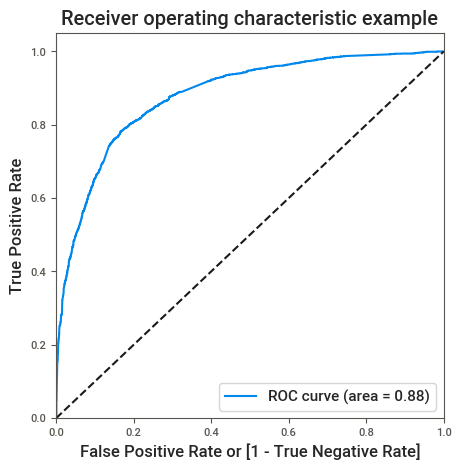

In [691]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### The area under ROC curve is 0.88 which indicates good predictive model

##### Finding Optimal Cutoff Point

In [692]:
# Creating columns with different probability cutoffs 
num = [float(x)/10 for x in range(10)]
for i in num:
  y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.468728,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.073586,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.245436,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.769532,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.209683,3934,0,1,1,1,0,0,0,0,0,0,0


In [693]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.381262,1.000000,0.000000
0.1,0.1,0.584570,0.974047,0.344578
0.2,0.2,0.722325,0.923358,0.598451
0.3,0.3,0.791899,0.834550,0.765617
0.4,0.4,0.813698,0.766018,0.843078
0.5,0.5,0.806741,0.660584,0.896802
0.6,0.6,0.794991,0.590430,0.921039
0.7,0.7,0.779066,0.507705,0.946277
0.8,0.8,0.754329,0.404704,0.969765
0.9,0.9,0.708411,0.248986,0.991504


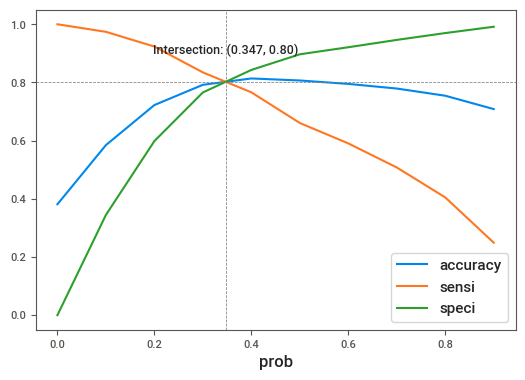

In [694]:
from scipy.interpolate import interp1d
from scipy.optimize import fsolve
interp_funcs = {col: interp1d(cutoff_df['prob'], cutoff_df[col], kind='linear') for col in ['sensi', 'accuracy', 'speci']}

# Find intersection points
intersection_x = np.round(float(fsolve(lambda x: interp_funcs['sensi'](x) - interp_funcs['accuracy'](x), 0.5)), 3)

plt.rcParams['figure.figsize'] = (6, 4)


# Plot accuracy, sensitivity, and specificity curves
ax = cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])

# Add vertical and horizontal lines at the intersection point
ax.axvline(x=intersection_x, color='grey', linewidth=0.55, linestyle='--')
ax.axhline(y=interp_funcs['accuracy'](intersection_x), color='grey', linewidth=0.55, linestyle='--')

# Annotate the intersection point on the plot
ax.annotate(f'Intersection: ({intersection_x}, {interp_funcs["accuracy"](intersection_x):.2f})',
             xy=(intersection_x, interp_funcs['accuracy'](intersection_x)),
             xytext=(0, 20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Adjust spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Display the plot
plt.show()

#### From the graph it can be said that the optimal cut off is at 0.347

In [695]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.347 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.468728,1871,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.073586,6795,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.245436,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.769532,8105,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.209683,3934,0,1,1,1,0,0,0,0,0,0,0,0


#### Calculating all metrics using confusion matrix for Train

In [696]:
#  User-Defined Function

def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))
    

In [697]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print('\n')

print("Confusion Matrix")
print(confusion_matrix,"\n")

print('\n')

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")




Confusion Matrix
[[3235  767]
 [ 488 1978]] 



True Negative                    :  3235
True Positive                    :  1978
False Negative                   :  488
False Positve                    :  767
Model Accuracy                   :  0.806
Model Sensitivity                :  0.8021
Model Specificity                :  0.8083
Model Precision                  :  0.7206
Model Recall                     :  0.8021
Model True Positive Rate (TPR)   :  0.8021
Model False Positive Rate (FPR)  :  0.1917




## With the cut off of 0.347 we have
 1. Accuracy = 80.6%
 2. Sensitivity = 80.21%
 3. Specificity = 80.83%

## Precision And Recall

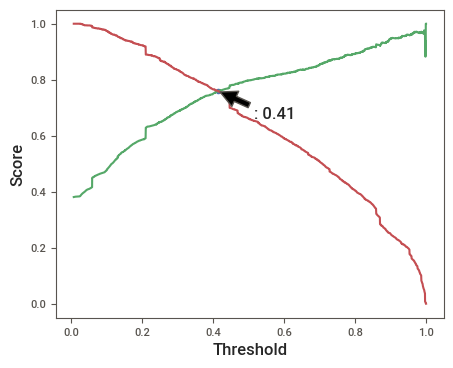

In [698]:
#TRADE OFF

from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

intersection_index = next(i for i, (precision, recall) in enumerate(zip(p, r)) if precision == recall)
intersection_threshold = thresholds[intersection_index]

plt.figure(figsize=(5, 4))
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")
plt.scatter([intersection_threshold], [p[intersection_index]], c='b', marker='o', label="Intersection Point")

# Annotate the intersection point
plt.annotate(f': {intersection_threshold:.2f}',
             xy=(intersection_threshold, p[intersection_index]),
             xytext=(intersection_threshold + 0.1, p[intersection_index] - 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))


plt.xlabel("Threshold")
plt.ylabel("Score")


plt.show()

##### NOTE : The intersection point on the curve represents the threshold where the model strikes a balance between precision and recall. This threshold, approximately 0.41 in our case, can be crucial for optimizing the model's performance based on specific business requirements.

In [699]:
# copying df to test model evaluation with precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()


# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,precision_recall_prediction
0,0,0.468728,1871,0,1,1,1,1,1,0,0,0,0,0,1,1
1,0,0.073586,6795,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.245436,3516,0,1,1,1,0,0,0,0,0,0,0,0,0
3,0,0.769532,8105,1,1,1,1,1,1,1,1,1,0,0,1,1
4,0,0.209683,3934,0,1,1,1,0,0,0,0,0,0,0,0,0


In [700]:
## Lets see all matrics at 0.41 cutoff in precision-recall view and compare it with 0.347 cutoff from sensi-speci view

# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print('\n')

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print('\n')

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")




Confusion Matrix
[[3402  600]
 [ 589 1877]] 



True Negative                    :  3402
True Positive                    :  1877
False Negative                   :  589
False Positve                    :  600
Model Accuracy                   :  0.8162
Model Sensitivity                :  0.7612
Model Specificity                :  0.8501
Model Precision                  :  0.7578
Model Recall                     :  0.7612
Model True Positive Rate (TPR)   :  0.7612
Model False Positive Rate (FPR)  :  0.1499




##### NOTE:

##### As we can see in above metrics when we used precision-recall threshold cut-off of 0.41 the values in True Positive Rate ,Sensitivity, Recall have dropped to around 76%, but we need it close to 80% as the Business Objective. Which we are getting with the sensitivity-specificity cut-off threshold of 0.347. So, we will go with sensitivity-specificity view for our Optimal cut-off for final predictions.

### Adding Lead Score to Training set
 - A higher score would mean that the lead is most likely to convert.

   
 - Whereas a lower score would mean that the lead is most likely not convert.

In [701]:
# Lets add Lead Score 

y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.468728,1871,0,1,1,1,1,1,0,0,0,0,0,1,47
1,0,0.073586,6795,0,1,0,0,0,0,0,0,0,0,0,0,7
2,0,0.245436,3516,0,1,1,1,0,0,0,0,0,0,0,0,25
3,0,0.769532,8105,1,1,1,1,1,1,1,1,1,0,0,1,77
4,0,0.209683,3934,0,1,1,1,0,0,0,0,0,0,0,0,21


### Prediction on Test set


##### Scaling 

In [702]:

num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test = X_test[rfe_col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Others,What is your current occupation_Working Professional
4269,0.964504,0,0,0,0,0,0,0,0,1,0,1,0
2376,-0.885371,0,0,1,0,0,0,0,0,1,0,1,0
7766,-0.777416,0,0,0,0,0,0,1,0,0,0,0,1
9199,-0.885371,0,1,0,0,0,0,0,0,0,0,1,0
4359,-0.885371,0,0,1,0,0,1,0,0,0,0,0,0


###### Prediction on Test Dataset using final model

In [703]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 14)

In [704]:
# making prediction using model3
y_test_pred = logm3.predict(X_test_sm)

In [705]:
# top 10 columns
y_test_pred[:10]

4269    0.699218
2376    0.858760
7766    0.891793
9199    0.058949
4359    0.869638
9186    0.504461
1631    0.420609
8963    0.155333
8007    0.045234
5324    0.299239
dtype: float64

In [706]:
# Changing to dataframe
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.699218
2376,0.858760
7766,0.891793
9199,0.058949
4359,0.869638


In [707]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [708]:
# Making Prospect ID index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes so we can append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.699218
1,1,2376,0.858760
2,1,7766,0.891793
3,0,9199,0.058949
4,1,4359,0.869638


In [709]:
# Renaming
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4269,1,0.699218
1,2376,1,0.858760
2,7766,1,0.891793
3,9199,0,0.058949
4,4359,1,0.869638


In [710]:
# taking sensitivity-specificity method at 0.347 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.347 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,4269,1,0.699218,1
1,2376,1,0.858760,1
2,7766,1,0.891793,1
3,9199,0,0.058949,0
4,4359,1,0.869638,1


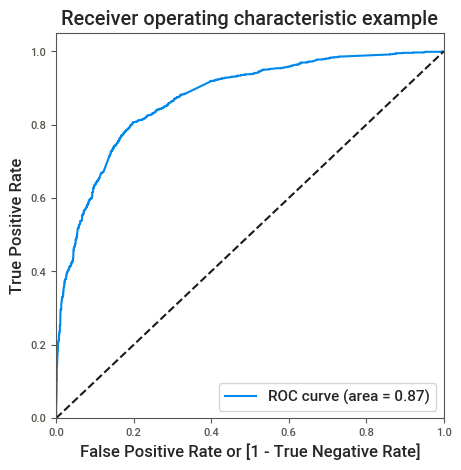

In [711]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

##### Area under ROC curve is 0.87 out of 1 which indicates a good predictive model

##### We will make final predictions by comparing the predicted labels (final_predicted) to the actual labels (Converted) to compute various performance metrics such as accuracy, precision, recall, etc.

##### Model Evaluation on Test set

In [712]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print('\n')

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print('\n')

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")



Confusion Matrix
[[1357  320]
 [ 221  874]] 



True Negative                    :  1357
True Positive                    :  874
False Negative                   :  221
False Positve                    :  320
Model Accuracy                   :  0.8048
Model Sensitivity                :  0.7982
Model Specificity                :  0.8092
Model Precision                  :  0.732
Model Recall                     :  0.7982
Model True Positive Rate (TPR)   :  0.7982
Model False Positive Rate (FPR)  :  0.1908




##### The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.

##### For Test set

    
 1. Accuracy = 80.48%
 2. Sensitivity = 79.82% ≈ 80%
 3. Specificity = 80.92%
##### These matrics are very close to train set, so out final model logm3 is  performing with good consistency on both Train & Test setm

In [713]:
# features and their coefficicent from final model
parameters=logm3.params.sort_values(ascending=False)
parameters

Lead Source_Welingak Website                            5.351789
Lead Source_Reference                                   2.904656
What is your current occupation_Working Professional    2.694484
Last Activity_SMS Sent                                  2.552356
Last Activity_Others                                    1.751688
Last Activity_Email Opened                              1.443494
Total Time Spent on Website                             1.050448
Lead Source_Olark Chat                                  0.881645
Last Activity_Email Link Clicked                        0.877776
Last Activity_Page Visited on Website                   0.793936
Specialization_Hospitality Management                  -1.062515
Specialization_Others                                  -1.201589
Lead Origin_Landing Page Submission                    -1.260421
const                                                  -1.520354
dtype: float64

##### A higher positive coefficient suggests a stronger influence of the variable in predicting the probability of leads converting to enroll in X-Education's course

### Adding Lead Score to Training set
 - A higher score would mean that the lead is most likely to convert.

   
 - Whereas a lower score would mean that the lead is most likely not convert.

In [714]:
# Lets add Lead Score 

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4269,1,0.699218,1,70
1,2376,1,0.858760,1,86
2,7766,1,0.891793,1,89
3,9199,0,0.058949,0,6
4,4359,1,0.869638,1,87


##### Lead Score is assigned to the customers

- The customers with a higher lead score will have a higher conversion chance
- The customers with a lower lead score will have a lower conversion chance.

### Conclusion
Train - Test

Train Data Set:
 1. Accuracy = 80.6%
 2. Sensitivity = 80.21%
 3. Specificity = 80.83%
    
Test Data Set:
 1. Accuracy = 80.48%
 2. Sensitivity = 79.82% ≈ 80%
 3. Specificity = 80.92%


#### The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.

##### The model has a sensitivity of 80.05% in the train set and 79.82% in the test set, using a cut-off value of 0.347. The CEO of X Education had set a target sensitivity of around 80% which is achieved and the model also achieved an accuracy of 80.46%, which is in line with the study's objectives.


### Model parameters
The final Logistic Regression Model has 13 features

Top 3 features that contributing positively to predicting hot leads in the model are:



- Lead Source_Welingak Website

- Lead Source_Reference

- What is your current occupation_Working Professional


#### Observations:

1. Focus on features with positive coefficients for targeted marketing strategies.

2. More budget can be spent on Welingak Website in terms of advertising ,marketing etc.

3. Working professionals to be can be targeted as they have high conversion rate and will be able to pay high fees too as they are financially able.

4. Areas with negative coefficients like 'Lead Origin_Landing Page Submission' should be analyzed and put more work on.  